In [3]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle (1).json
kaggle.json


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv('/content/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56885,47653,0.846286,-0.526173,0.067258,1.351525,-0.313241,0.319000,-0.009989,0.256176,0.421805,0.048153,0.437123,-0.238529,-2.680828,0.785101,-0.472273,-0.291909,0.044502,-0.032443,0.013178,-0.019829,-0.007825,-0.292977,-0.220249,-0.362076,0.533832,-0.317162,-0.009950,0.023667,161.91,0.0
43594,41571,0.745344,-1.226500,0.744034,0.254463,-1.302056,0.184528,-0.527869,0.222494,1.100956,-0.359096,0.434680,0.604464,-1.066941,-0.116309,-0.834504,0.251720,-0.158180,0.139837,0.812286,0.346113,-0.076170,-0.568781,-0.163088,0.073011,0.029665,0.923974,-0.088451,0.038803,239.14,0.0
23490,32782,-0.405225,-0.190637,0.970736,-2.242655,-1.342921,-0.744379,-0.376720,0.281106,-2.608324,0.527541,-0.168779,-0.154505,1.531995,-0.331825,-0.074465,-0.503965,0.705697,-0.607598,-1.405569,-0.364015,0.015640,0.246809,0.225142,0.395429,-0.308665,-0.418548,-0.051923,-0.017399,61.92,0.0
45754,42483,-1.205139,0.431932,2.404573,0.977382,0.533020,-0.237717,0.379045,0.195308,-0.768379,-0.414577,-0.600266,0.139547,-0.115642,-0.361208,-1.173757,-0.104466,0.146591,-1.203580,-1.295546,0.010405,0.032933,0.046753,-0.159384,0.469311,0.349029,0.933077,-0.050380,0.058022,19.95,0.0
41592,40749,1.036307,-1.447374,1.116090,-0.789358,-1.975657,-0.077370,-1.298335,0.207691,0.032136,0.505344,-0.564191,-0.826682,-0.838175,-0.091630,1.958939,-0.804062,0.052296,1.283751,-1.448952,-0.264295,-0.083517,-0.077080,0.019195,0.115564,-0.294173,1.514266,-0.049679,0.039272,146.81,0.0


In [7]:
df['Class'].value_counts()

0.0    59348
1.0      162
Name: Class, dtype: int64

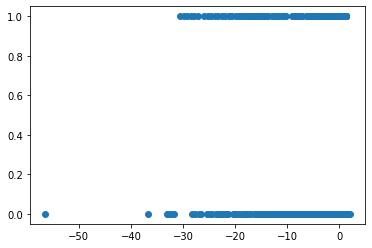

In [8]:
plt.scatter(df['V1'],df['Class'])

In [13]:
df.dropna(inplace=True)

In [33]:
X = df.drop(columns = ['Class','Time'])
y = df['Class']

In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled  = scale.fit_transform(X)

In [36]:
oversample = SMOTE()
X_scaled , y = oversample.fit_resample(X_scaled, y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


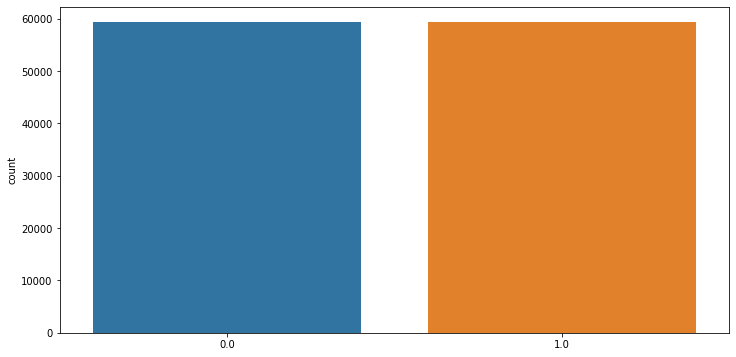

In [37]:
sns.countplot(y)
plt.show()

In [39]:
pca = PCA(0.95)
covarience = pca.fit(X_scaled) 
np.cumsum(covarience.explained_variance_ratio_)

array([0.74469611, 0.84713257, 0.89947218, 0.92050185, 0.9336214 ,
       0.94212023, 0.94853034, 0.95328278])

In [40]:
pca1 = PCA(7)
X_decomposed = pca1.fit_transform(X_scaled)

In [43]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_decomposed, y, train_size = 80/100, random_state = 100) 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
#@title OUTPUT
svc = SVC()
lg = LogisticRegression() 
knn = KNeighborsClassifier(2)
# k_range = list(range(2,15))
# param_grid = dict(n_neighbors = k_range)
# grid = GridSearchCV(knn, param_grid, cv =10, scoring = 'accuracy')
# grid_search = grid.fit(X_train, y_train)


In [48]:
svc.fit(X_train, y_train)
lg.fit(X_train, y_train)
knn.fit(X_train, y_train)
output = pd.DataFrame(data = [
                              [f'{round(accuracy_score(svc.predict(X_test), y_test)*100,2)} %'],
                               [f'{round(accuracy_score(lg.predict(X_test), y_test)*100,2)} %'],
                               [f'{round(accuracy_score(knn.predict(X_test), y_test)*100,2)} %']
                              ], index = ['SVM','Logistic','KNN'],columns = ['Accuracy'])
output

,Accuracy
SVM,97.22 %
Logistic,95.8 %
KNN,99.86 %


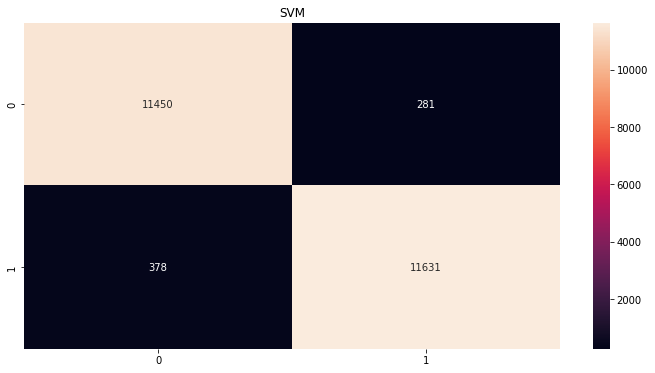

In [53]:
sns.heatmap(confusion_matrix(svc.predict(X_test), y_test),annot= True,fmt = 'd')
plt.title('SVM')
plt.show()

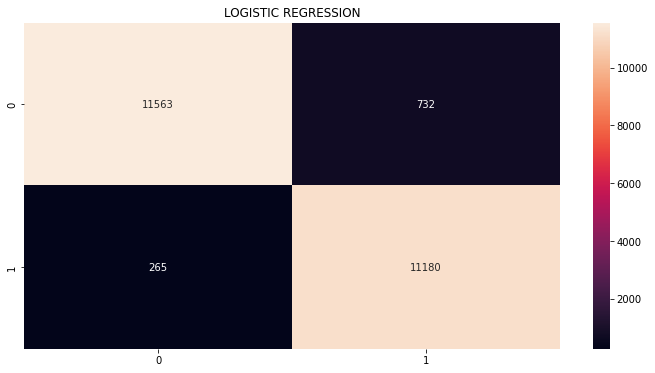

In [52]:
sns.heatmap(confusion_matrix(lg.predict(X_test), y_test),annot= True,fmt = 'd')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [49]:
scale_x = StandardScaler()
X_scale = scale_x.fit_transform(X) 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scale, df['Class'], train_size = 80/100, random_state = 50) 

In [50]:
svc1 = SVC()
lg1 = LogisticRegression()
svc1.fit(Xtrain, ytrain)
lg1.fit(Xtrain, ytrain)
output = pd.DataFrame(data = [
                              [f'{round(accuracy_score(svc1.predict(Xtest), ytest)*100,2)} %'],
                               [f'{round(accuracy_score(lg1.predict(Xtest), ytest)*100,2)} %']
                              ], index = ['SVM','Logistic'],columns = ['Accuracy'])
output

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy
SVM,99.93 %
Logistic,99.85 %


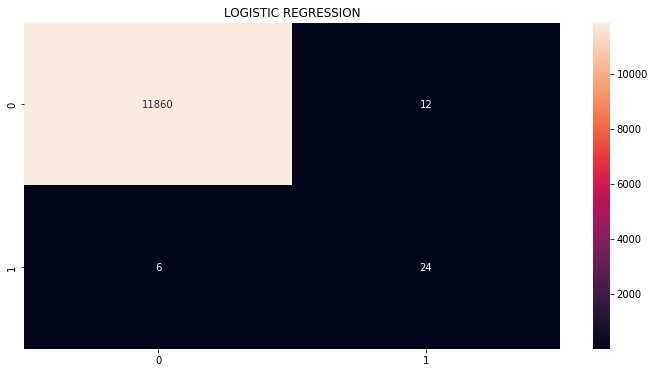

In [51]:
sns.heatmap(confusion_matrix(lg1.predict(Xtest), ytest),annot= True,fmt = 'd')
plt.title('LOGISTIC REGRESSION')
plt.show()

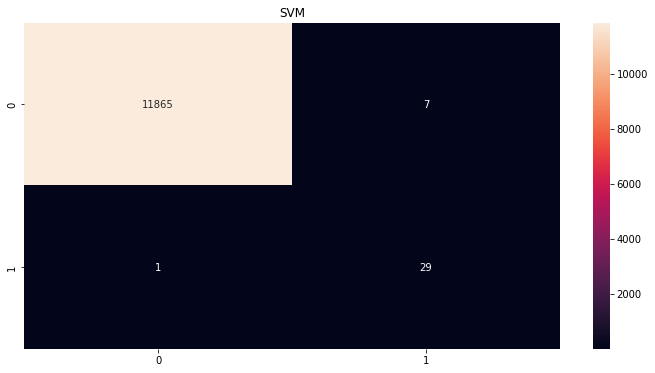

In [54]:
sns.heatmap(confusion_matrix(svc1.predict(Xtest), ytest),annot= True,fmt = 'd')
plt.title('SVM')
plt.show()